In [24]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [32]:
df1=pd.read_csv('train_ctrUa4K.csv')
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [33]:
df1.shape

(614, 13)

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [35]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# Load ID is just the representation of the applicant
# So it can be removed from the analysis

In [36]:
df1.drop(columns='Loan_ID',inplace=True)
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [37]:
# numerical columns 
num_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

In [ ]:
# univariate analysis 

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

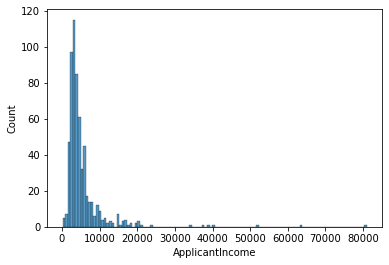

In [38]:
# histogram 
sns.histplot(data=df1,x='ApplicantIncome')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

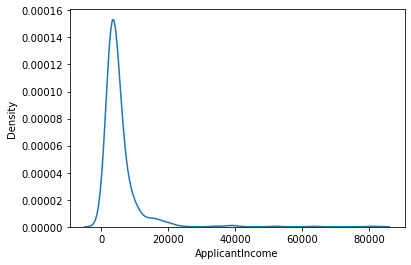

In [40]:
# kde plot
sns.kdeplot(data=df1, x='ApplicantIncome')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


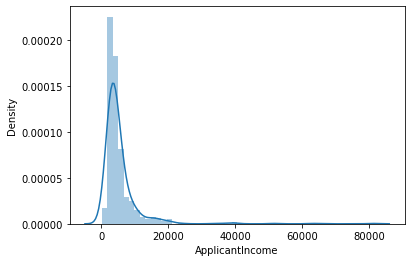

In [42]:
sns.distplot(df1['ApplicantIncome'])
plt.show()

<AxesSubplot:xlabel='ApplicantIncome'>

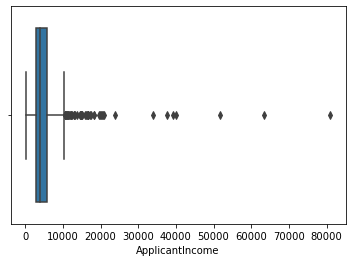

In [45]:
# boxplot 
sns.boxplot(data=df1,x='ApplicantIncome')

<AxesSubplot:>

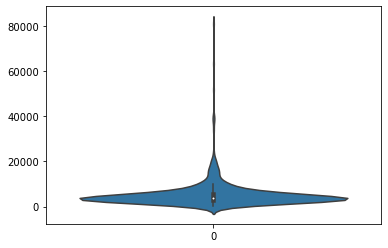

In [47]:
# violin plot
sns.violinplot(data=df1['ApplicantIncome'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

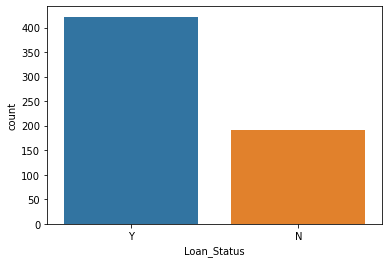

In [48]:
# for categorical 
sns.countplot(data=df1,x='Loan_Status')

In [ ]:
# df[colname].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Loan_Status'>

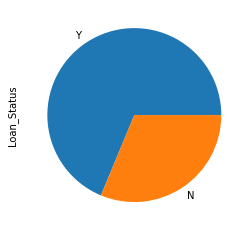

In [49]:
# pie chart
df1['Loan_Status'].value_counts().plot(kind='pie')

In [ ]:
# bivariate analysis - it is the analysis of two variables 
# 1- num vs num (scatter plot)
# 2 - num vs cat (swarm plot, box plot)
# 3 - cat vs cat (bar graph with cross tab)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

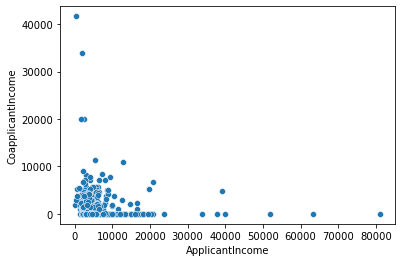

In [50]:
# scatter plot
sns.scatterplot(data=df1,x='ApplicantIncome', y='CoapplicantIncome')

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

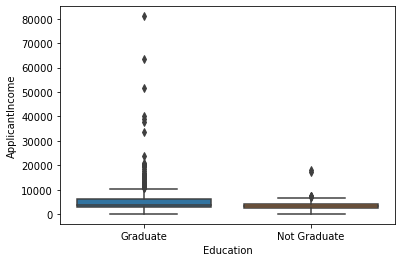

In [51]:
# boxpplot 
sns.boxplot(data=df1, x='Education', y='ApplicantIncome')

<AxesSubplot:xlabel='Education'>

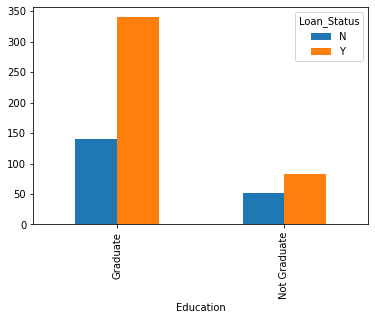

In [53]:
# cat vs cat 
pd.crosstab(df1['Education'],df1['Loan_Status']).plot(kind='bar')

In [54]:
# ratio method 
pd.crosstab(df1['Education'], df1['Loan_Status'])

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

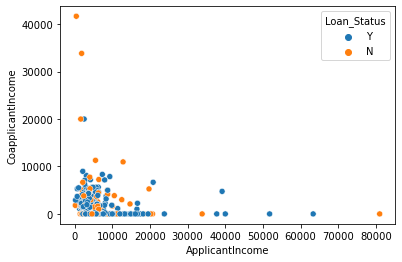

In [55]:
# multivariate analysis- it is used to study more than 2 variables 
sns.scatterplot(data=df1,x='ApplicantIncome', y='CoapplicantIncome', hue='Loan_Status')

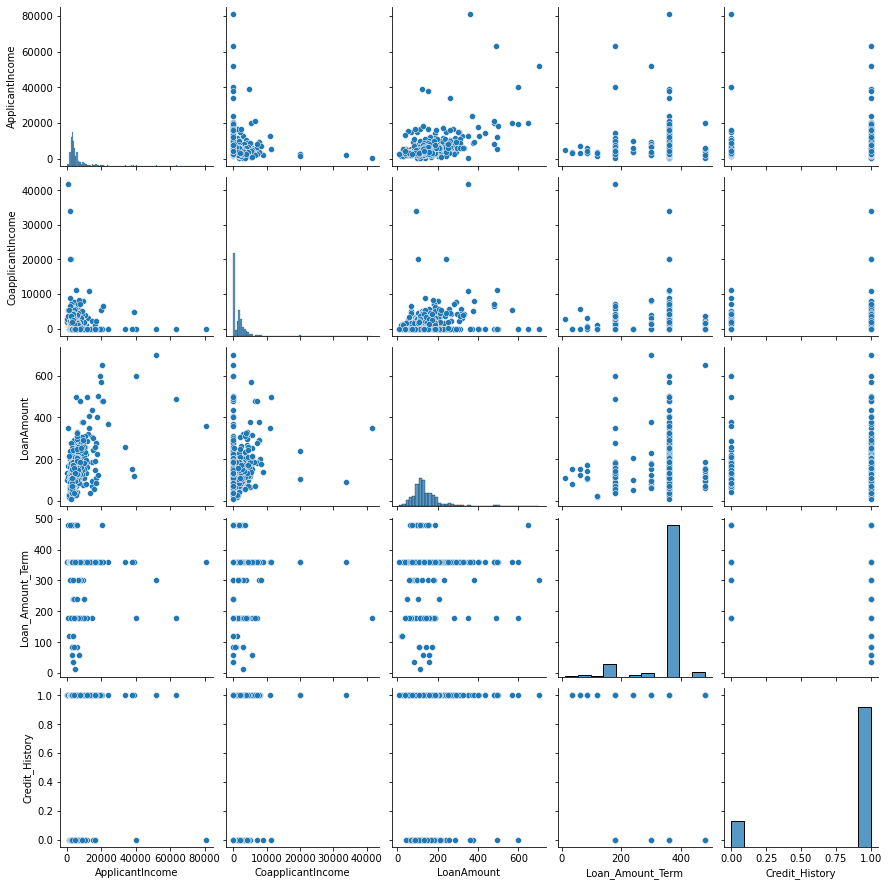

In [56]:
sns.pairplot(df1) # used for making multiple graphs

<AxesSubplot:>

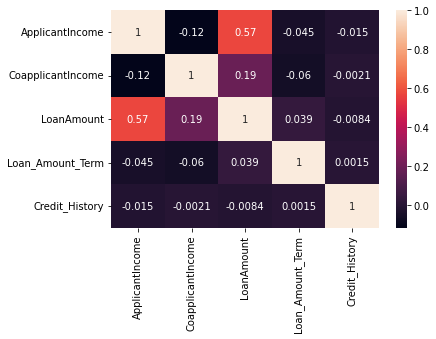

In [57]:
# heatmap with correlation 
sns.heatmap(df1.corr(), annot=True)